# Six States protocol with bil flip phase errors.
In this protocol we will introduce bit flip errors in the sending process. In this cell we define some functions and randomly generate the key, Asja and Balvis basis. 

In [1]:


# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter
from qiskit.qasm3 import dumps
from qiskit_ibm_runtime import Sampler
from qiskit.compiler import transpile
from qiskit_aer import Aer
from random import randrange
from qiskit.primitives import BackendSampler
import hashlib 



def print_outcomes_in_reserve(counts): # takes a dictionary variable
    for outcome in counts: # for each key-value in dictionary
        reverse_outcome = ''
        for i in outcome: # each string can be considered as a list of characters
            reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    return reverse_outcome

#Source for SendState: awards/teach_me_qiskit_2018/cryptography/Cryptography.ipynb



def NoisyChannel(qc1, qc2, qc1_name):
    ''' This function is will send the qubits to balvis and in which some bit flif errors
    would have introduced
    ''' 
    
    qs = dumps(qc1).split(sep=';')[4:-1]
    print(qs)

    

    # Process the code to get the instructions 
    for index, instruction in enumerate(qs):
        qs[index] = instruction.lstrip() #replaces the original instruction(string odf quantum instruction) with the striped version

    # Parse the instructions and apply to new circuit
    for instruction in qs:
        # print(instruction)
        if instruction[0] == 'x':
            if instruction[5] == '[':
                    old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.x(qreg[old_qr])
        elif instruction[0] == 'h':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.h(qreg[old_qr])
        elif instruction[0] == 's':
            if instruction[5] == '[':
                old_qr = int(instruction[6:-1])
            else:
                old_qr = int(instruction[5:-1])
            qc2.x(qreg[old_qr])

        elif instruction[0] == 'm': # exclude measuring:
            
            pass
        else:
            raise Exception('Unable to parse instruction')
        
        

qreg = QuantumRegister(24) # quantum register with 24 qubits
creg = ClassicalRegister(24) # classical register with 24 bits

# Quantum circuit for Asja state
asja = QuantumCircuit(qreg, creg, name='Asja')

send=[] #Initial bit string to send
asja_basis=[] #Initial Asja Basis
balvis_basis=[] #Initial Balvis basis

# Creating randomly chosen basis for Asja (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    asja_basis.append(a_b)
asja_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in asja_basis]
print("Asja Basis:      ",asja_basis)


# Creating randomly chosen basis for Balvis (X,Y,Z)
for i in range(24):
    a_b = randrange(3)
    balvis_basis.append(a_b)
balvis_basis = ['X' if x==1 else "Y" if x==0 else "Z" if x==2 else x for x in balvis_basis]
print("Balvis Basis:        ",balvis_basis)



#Creating random bit string
for i in range(24):
    bit = randrange(2)
    send.append(bit)
print("The bits Asja wants to send:     ",send)

    


Asja Basis:       ['Y', 'Z', 'Z', 'X', 'Y', 'X', 'X', 'Z', 'X', 'X', 'X', 'Y', 'X', 'Z', 'X', 'Y', 'Z', 'Z', 'Z', 'Y', 'Z', 'Y', 'X', 'Y']
Balvis Basis:         ['Z', 'Y', 'Z', 'Z', 'X', 'Y', 'Y', 'X', 'Z', 'Z', 'Z', 'Y', 'Y', 'Y', 'Z', 'X', 'Y', 'Y', 'X', 'X', 'Y', 'X', 'X', 'Y']
The bits Asja wants to send:      [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0]


In this cell Asja will apply the gates coresponding to her basis to the initial quibits.

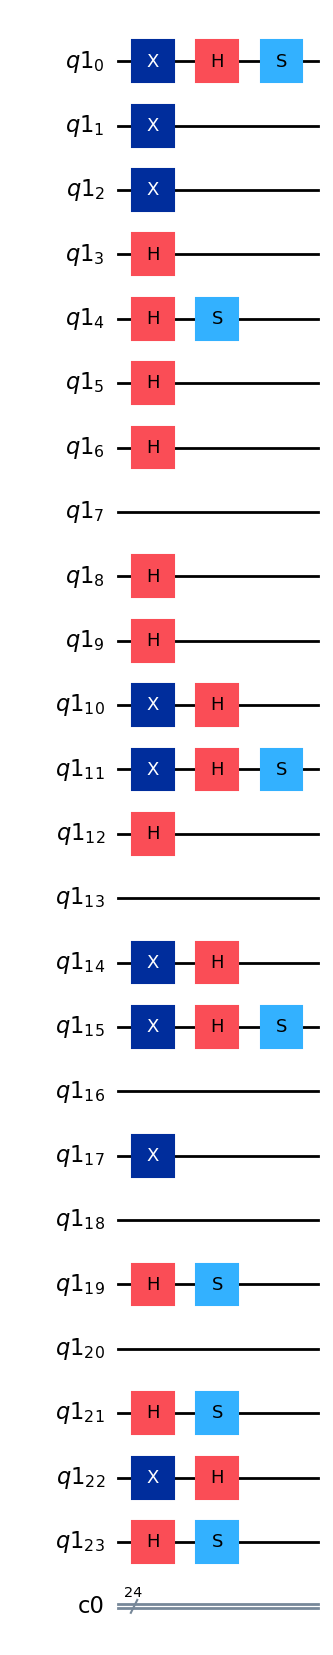

In [2]:
#Apply X gate if bit is equal to 1
for i, n in enumerate(send):
    if n==1:
        asja.x(qreg[i]) # apply x-gate
for i, k in enumerate(asja_basis): 
    if k=='X':
        asja.h(qreg[i])
    if k=="Y":
        asja.h(qreg[i])
        asja.s([qreg[i]])
            
        send_str = ''.join(str(e) for e in send)



asja.draw("mpl") #To check gates applied correctly/'

In this cell the Balvis will reciev the states with some blit flip errors and then will apply gates according to his basis.

['\nx q1[0]', '\nx q1[1]', '\nx q1[2]', '\nx q1[10]', '\nx q1[11]', '\nx q1[14]', '\nx q1[15]', '\nx q1[17]', '\nx q1[22]', '\nh q1[0]', '\ns q1[0]', '\nh q1[3]', '\nh q1[4]', '\ns q1[4]', '\nh q1[5]', '\nh q1[6]', '\nh q1[8]', '\nh q1[9]', '\nh q1[10]', '\nh q1[11]', '\ns q1[11]', '\nh q1[12]', '\nh q1[14]', '\nh q1[15]', '\ns q1[15]', '\nh q1[19]', '\ns q1[19]', '\nh q1[21]', '\ns q1[21]', '\nh q1[22]', '\nh q1[23]', '\ns q1[23]']


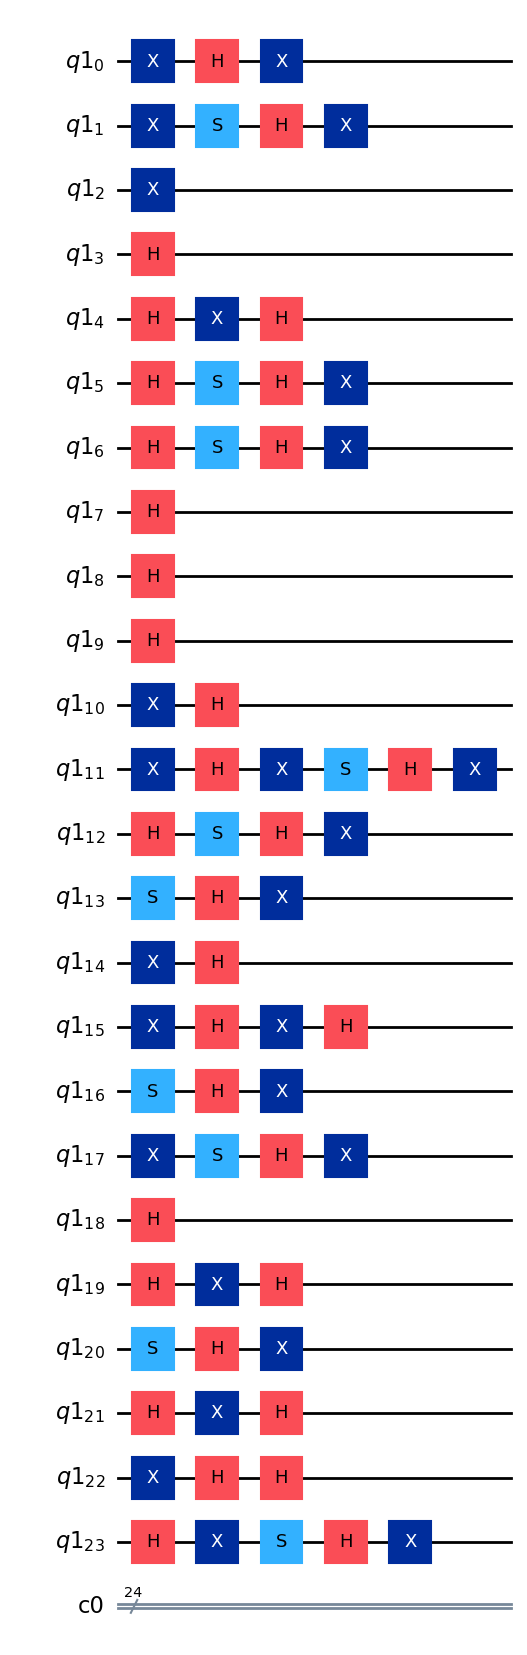

In [3]:
balvis = QuantumCircuit(qreg, creg, name='Balvis') #Defining Balvis circuit
NoisyChannel(asja, balvis, 'Asja') #Asja sends states to Balvis

for i, k in enumerate(balvis_basis): 
    if k=='X':
        balvis.h(qreg[i])
    if k=="Y":
        balvis.s(qreg[i])
        balvis.h(qreg[i])
        balvis.x(qreg[i])


            

balvis.draw("mpl")

Balvis will measure the states in computational basis.

In [4]:
balvis.measure(qreg,creg)

job = assemble(balvis)
result = Aer.get_backend('qasm_simulator').run(job).result()
counts = result.get_counts(balvis)
received = print_outcomes_in_reserve(counts)

print("Asja sent:", send_str)
print("Balvis received:", received)


Asja sent: 111000000011001101000010
Balvis received: 001101011000100101000010


C:\Users\dell\AppData\Local\Temp\ipykernel_7988\2688098230.py:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = Aer.get_backend('qasm_simulator').run(job).result()


The sifted key Balvis and And would keep

In [6]:

asja_key=[] #Asjas register for matching rounds
balvis_key=[] #Balvis register for matching rounds
for j in range(0,len(asja_basis)): #Going through list of bases 
    if asja_basis[j] == balvis_basis[j]: #Comparing
        asja_key.append(send[j])
        balvis_key.append(received[j]) #Keeping key bit if bases matched
    else:
        pass #Discard round if bases mismatched
balvis_key = [eval(i) for i in balvis_key]

print("Asjas key =", asja_key)
print("Balvis key =", balvis_key)
        

Asjas key = [1, 1, 1, 0]
Balvis key = [1, 0, 1, 0]


Error Correction

In [7]:
rounds = len(asja_key)//3    #To divide without remainer, use //

errors=0
for i in range(rounds):
    bit_index = randrange(len(asja_key)) 
    
    tested_bit = asja_key[bit_index]
    print ("Asja randomly selected bit index =", bit_index, ", and its value is = ", tested_bit)
    if asja_key[bit_index]!=balvis_key[bit_index]: #comparing tested rounds
        errors=errors+1 #calculating errors
    #removing tested bits from key strings
    del asja_key[bit_index] #Use del to specify the index of the element you want to delete
    del balvis_key[bit_index]
if rounds!=0:
    QBER=errors/rounds #calculating QBER
else:
    print("the key is too short for privacy amplification ")       
print("QBER value =", QBER)
print("Asjas secret key =", asja_key)
print("Balvis secret key =", balvis_key)
print("Number of errors = ", errors)


Asja randomly selected bit index = 1 , and its value is =  1
QBER value = 1.0
Asjas secret key = [1, 1, 0]
Balvis secret key = [1, 1, 0]
Number of errors =  1


### Information reconciliation
After the error correction our key maybe same maybe not. To get corrected key in the last we use classical methods of information reconciliation and privacy amplification just like we did in BB84.

## Home Work
As you saw in this protocol the error was introduced during the process of sending (In the function StateSend) can you introduce the error by actually introducing an evesdropper? 
### Hint
When Asja send the state to Balvis, on the way Eve measures the states and then send it to Balvis, you can implement this protocol by giving Eve the initial quantum circuit the Asja circuit and Balvis the initial circuit the Eve one.

You can check the answer by clicking this:


[Answer](six_states_with_evesdropper.ipynb)